In [4]:
#A2
#Srinivas Veerabomma - 2018AB04179 (group lead)
#Rupesh Mokshagundam - 2018AB04159
#RAJA MAHESH ARAVAPALLI - 2018AB04180

<h4> 

Batch Name : S2-18_DSECL_IDS_BAN2 (Bangalore - S2-18) 

<br>
</h4>

<h3>Importing Libraries</h3>

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

import seaborn as sns
sns.set()

#%config InlineBackend.figure_format = 'svg'


import os
from PIL import  Image
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff




<h3>Importing the data set</h3>

In [6]:
telco_input_ds = pd.read_csv("data.csv")


<h3>Preview of Dataset</h3>

In [7]:
# Preview the first 5 records of the data set. 
#This gives the good peek of the data and also confirms that the dataframe was created on top of the xls data sheet
telco_input_ds.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# understand the metrics around the data. 
# For each feature in the dataset, "describe" command provides the count, mean, standard deviation, min, max etc
telco_input_ds.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# check if there are null values present in any feature in the dataset
telco_input_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [10]:
# count the distribution of the target variable - "churn"
telco_input_ds['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [11]:
# check how many rows and columns of data present in the dataset
telco_input_ds.shape

(3333, 21)

In [12]:
X = telco_input_ds.iloc[:,:-1].values

In [13]:
X.shape

(3333, 20)

In [14]:
y = telco_input_ds.iloc[:,-1:].values

In [15]:
y.shape

(3333, 1)

<h3>Visualize the dataset</h3>

<h4>Perform the coorelation analysis between the features</h4>

In [16]:
# create a correlation matrix among the features present in the dataset
telco_input_ds_correlation = telco_input_ds.corr()
telco_input_ds_correlation

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


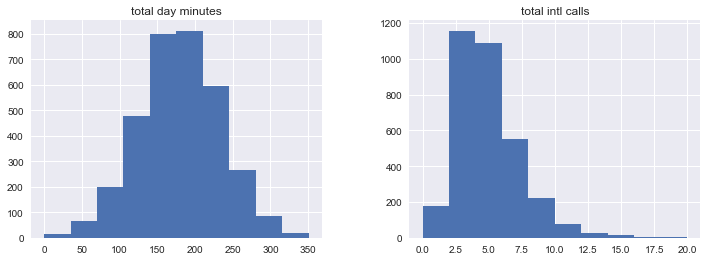

In [17]:
%matplotlib inline

# create a histogram for two features - "total day minutes" & "total intl calls"
hist_features = ['total day minutes', 'total intl calls']
telco_input_ds[hist_features].hist(figsize=(12,4));

In [18]:
%matplotlib inline
#import seaborn as sns
#sns.heatmap(telco_input_ds_correlation, annot = True)

In [19]:
#list out unique values present in the target variable - "churn"
churn_labels = telco_input_ds["churn"].value_counts().keys().tolist()
#count how many observations were having Churn value False or True
churn_values = telco_input_ds["churn"].value_counts().values.tolist()

In [20]:
churn_labels

[False, True]

In [21]:
churn_values

[2850, 483]

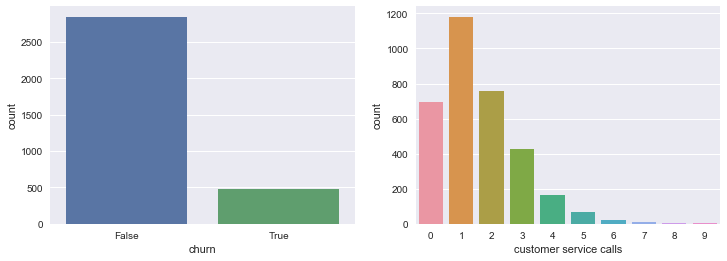

In [22]:
# Create visualizations of the above data ("churn" target variable) and the other feature ("customer service calls")
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=telco_input_ds, ax=axes[0]);
sns.countplot(x='customer service calls', data=telco_input_ds, ax=axes[1]);

In [23]:
trace = go.Pie(labels = churn_labels ,
               values = churn_values ,
               marker = dict(colors =  [ 'greeen' ,'red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition numbers in Donut chart",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

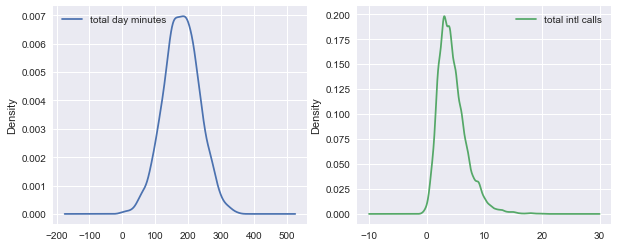

In [24]:
# create density plots for the features - "total daily minutes" & "total intl calls"
telco_input_ds[hist_features].plot(kind='density', subplots=True, layout=(1, 2),sharex=False, figsize=(10, 4));

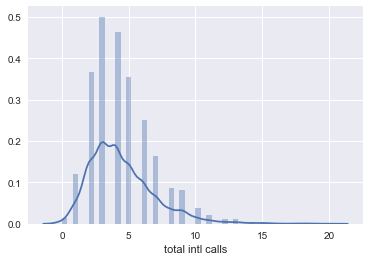

In [25]:
#create dist plot for the feature - "total intl calls"
sns.distplot(telco_input_ds['total intl calls']);

In [26]:
telco_input_ds[hist_features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


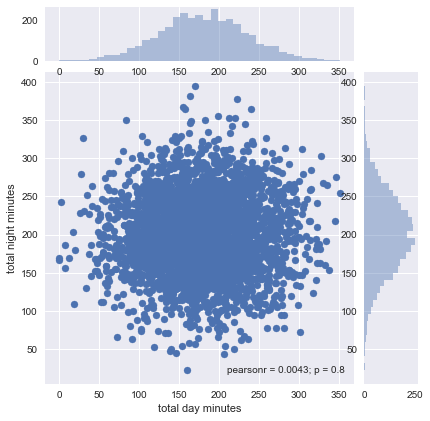

In [27]:
# create scatter plot using two input features - "total night minutes" & "total day minutes"
sns.jointplot(x='total day minutes', y='total night minutes', data=telco_input_ds, kind='scatter');

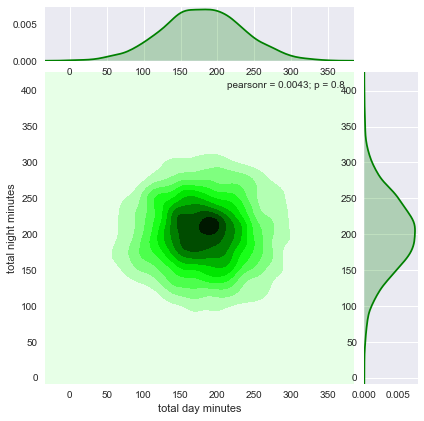

In [28]:
#create a kde plot and it shows the density of the feature for each value of the target
sns.jointplot('total day minutes', 'total night minutes', data=telco_input_ds,kind="kde", color="g");

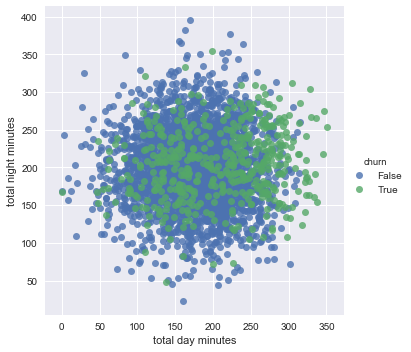

In [29]:
#create a scatter plot using three dimensions - "total night minutes" , "total day minutes" & "churn"
sns.lmplot('total day minutes', 'total night minutes', data=telco_input_ds, hue='churn', fit_reg=False);

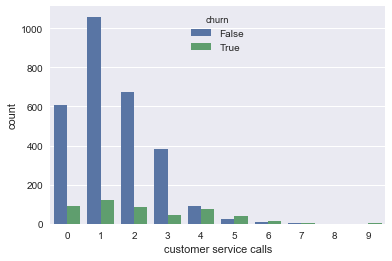

In [30]:
sns.countplot(x='customer service calls', hue='churn', data=telco_input_ds);

In [31]:
# replace the categorical Target variable - "Churn" values "FALSE", "TRUE" with "0" , "1" 
telco_input_ds.churn = telco_input_ds.churn.replace(to_replace = [False,True],value = [0,1])

# replace the categorical input variable - "international plan" values "no", "yes" with "0" , "1" 
telco_input_ds['international plan'] = telco_input_ds['international plan'].replace(to_replace = ['no','yes'],value = [0,1])

# replace the categorical input variable - "voice mail plan" values "no", "yes" with "0" , "1" 
telco_input_ds['voice mail plan'] = telco_input_ds['voice mail plan'].replace(to_replace = ['no','yes'],value = [0,1])

In [32]:
#display the data after above transformations
telco_input_ds.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [33]:
telco_input_ds['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [34]:
#After analyzing the data, we have decided to drop the two input variables - "State" and "Phone Number" 
# from the data frame as it will not influence the churn prediction
telco_input_ds_new = telco_input_ds.drop(['state','phone number'],axis=1)

In [35]:
telco_input_ds_new

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


<h3>Model building activities</h3>

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
en = LabelEncoder()

In [38]:
telco_input_ds_new['area code'] = pd.DataFrame(en.fit_transform(telco_input_ds_new['area code']))

In [39]:
telco_input_ds_new

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [40]:
# identify the correlation between the different input features present in the input data set
telco_input_ds_new.corr()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.014530,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.014530,1.000000,0.044033,0.009875,0.009077,0.010475,-0.007057,0.010478,0.000283,-0.002106,0.000304,0.007098,0.028307,0.007078,0.001549,-0.008069,0.001437,0.028250,0.003256
international plan,0.024735,0.044033,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,0.009875,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,0.009077,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.010475,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.007057,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.010478,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.000283,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.002106,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [41]:
#voice mail plan and number vmail messages are highly correlated
#total day minutes and total day charge are Highly correlated
#total eve minutes and total eve charge are Highly correlated
#total night minutes and total night charge are Highly correlated
#total intl minutes and total intl charge are Highly correlated

# dropping the following features as these are highly correlated. 
telco_input_ds_new = telco_input_ds_new.drop(['voice mail plan','total day minutes','total eve minutes','total night minutes','total intl minutes'],axis=1)

In [42]:
telco_input_ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int64
number vmail messages     3333 non-null int64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
churn                     3333 non-null int64
dtypes: float64(4), int64(10)
memory usage: 364.6 KB


<h3>Split the data into training set and testing set</h3>

In [43]:
X = features = telco_input_ds_new[telco_input_ds_new.columns[:-1]]
y = label = telco_input_ds_new[telco_input_ds_new.columns[-1:]]


In [44]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [45]:
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=1,train_size=0.7,test_size=0.3)

In [46]:
stratified_shuffle_split.split(X,y)

<generator object BaseShuffleSplit.split at 0x000001DBF5C53D00>

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

y_test.churn.value_counts()


0    862
1    138
Name: churn, dtype: int64

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()

In [50]:
model = gnb.fit(X=X_train,y=y_train)

In [51]:
pred = model.predict(X=X_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_true=y_test,y_pred=pred)

array([[786,  76],
       [ 82,  56]], dtype=int64)

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(y_true=y_test,y_pred=pred)

0.4148148148148148

<h3>Our Analysis and Remarks based on algorithm</h3>

We have used Gaussian Naive Bayes algorithm to solve this classification problem of "Churn" prediction.

Like any other model, we have analyzed the data set and understood the dependent and indendent variables. We have created multiple visualizations to find out the relationships between different variables - both dependent and independent variables or features.

The following 20 variables were the independent variables in the dataset. 

 - state	
 - account length	
 - area code	
 - phone number	
 - international plan	
 - voice mail plan	
 - number vmail messages	
 - total day minutes	
 - total day calls	
 - total day charge	
 - total eve minutes	
 - total eve calls	
 - total eve charge	
 - total night minutes	
 - total night calls	
 - total night charge	
 - total intl minutes	
 - total intl calls	
 - total intl charge	
 - customer service calls	

The dependent or target variable is :
 - churn

The dependent variable is categorical variable with values <b>TRUE</b> or <b>FALSE</b> in the given dataset

We also noticed some categorical independent variables in the dataset :

 - state
 - international plan	
 - voice mail plan

After analyzing the data, we have decided to drop the two input variables - "State" and "Phone Number" from the data frame as it will not influence the churn prediction

We have also encoded the two categorical independent variables and dependent variable - 

 - international plan [no ==> 0 and yes ==> 1]
 - voice mail plan [no ==> 0 and yes ==> 1]
 - churn [FALSE ==> 0 and TRUE ==> 1]

In our analysis, we have observed the following :

 - voice mail plan and number vmail messages are highly correlated
 - total day minutes and total day charge are Highly correlated
 - total eve minutes and total eve charge are Highly correlated
 - total night minutes and total night charge are Highly correlated
 - total intl minutes and total intl charge are Highly correlated

so we have decided to drop the following columns from the dataset before building the model :

 - voice mail plan
 - total day minutes
 - total eve minutes
 - total night minutes
 - total intl minutes

We did not see any NULL or missing values in the dataset so it saved the process of applying imputation techniques on the missing data.

As part of feature engineering, we have encoded some variables, dropped some highly correlated variables and created "feature" and "labels".

Like any other model building exercise, we have split the dataset into training [70% data] and test [30% data]. Test dataset contains total of 1000 observations with :

 - 862 observations as Churn as FALSE [or 0] and 
 - 168 observations as Churn as TRUE  [or 1] 

We have used Gaussian Naive Bays classification model using skitlearn libraries. We have observed that the model correctly predicted 842 observations out of 1000 with 84% accuracy. We also observed that, our of 862 Churn=FALSE, 768 observations were correctly predicted by the model with 91% accuracy. However, for the other class - Churn=TRUE, out of 168 observations, only 56 observations were correctly predicted with the 41% accuracy. Due to time constraint, we did not put extra effort. The following are the next steps we can take to improve the model accuracy :

 - Using feature engineering, derive additional variables and use them in the model
 - Perform Cross validation
 - Change the % of train/test data split and see which % is giving the better results
 - Try different models such as Logistic Regression, SVM etc
